In [25]:
import pandas as pd
import warnings

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import numpy as np
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv('datatraining.txt')
df.drop(['date','Humidity'],axis=1,inplace=True)

In [3]:
train=df[:int(len(df)*0.8)]
test=df[int(len(df)*0.8):]

In [ ]:
#Finding Actual Occupancy Stats on TEST DATA

In [4]:
test['Occupancy'].value_counts()

0    1041
1     588
Name: Occupancy, dtype: int64

In [5]:
#Our Model

In [6]:
Pred=pd.read_csv('LSTMPred.csv')

In [7]:
Pred.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
Pred.index = np.arange(6516, 6516+len(Pred))

In [9]:
Pred

,Temperature,Light,CO2,HumidityRatio
6516,19.396378,1.853306,465.20703,0.003659
6517,19.395535,1.853306,465.84555,0.003656
6518,19.394460,1.853306,465.71777,0.003654
6519,19.392784,1.853306,465.14554,0.003653
6520,19.389973,1.853306,464.30130,0.003653
...,...,...,...,...
8129,20.953428,425.801600,724.50385,0.005370
8130,20.974552,425.801600,734.82920,0.005386
8131,20.992308,425.801600,743.40290,0.005393
8132,21.003292,425.801600,752.00256,0.005400


In [10]:
profile = ProfileReport(Pred, title="Pandas Profiling Report")

In [27]:
profile.to_file("LSTM_Pred_Report.html")

In [16]:
#Visual Aid

In [17]:
train.drop('Occupancy',axis=1,inplace=True)
test.drop('Occupancy',axis=1,inplace=True)

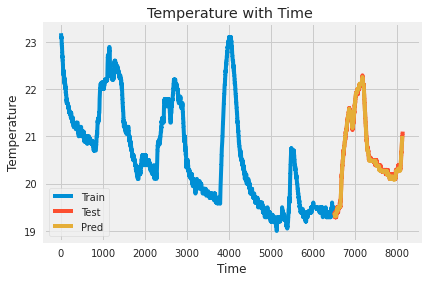

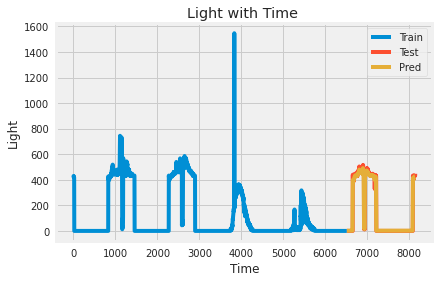

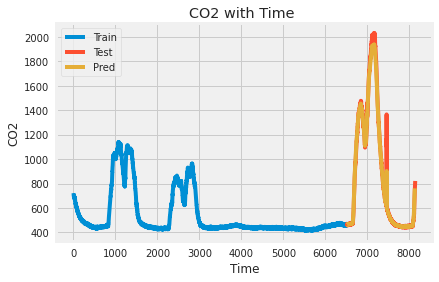

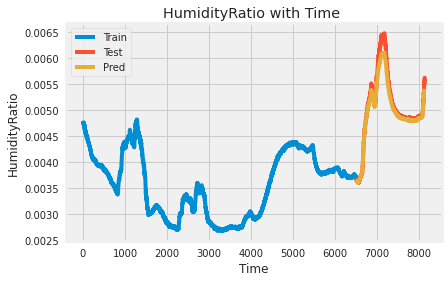

In [26]:
for i in train.columns:
    plt.title("{} with Time ".format(i))
    plt.xlabel("Time")
    plt.ylabel(i)
    train[i].iloc[:].plot(label="Train")
    test[i].iloc[:].plot(label="Test")
    Pred[i].iloc[:].plot(label="Pred")
    plt.legend()
    plt.show()

In [12]:
#Making Classication On the Model

In [13]:
import pickle
model = pickle.load(open('classifier.pkl', 'rb'))
y_pred=model.predict(Pred)

In [14]:
print("The No. of correct classication of occupancy by the model is {} /588 ".format((y_pred==1).sum()))
print("The No. of correct classication of inoccupancy by the model is {} /1041 ".format((y_pred==0).sum()))

The No. of correct classication of occupancy by the model is 583 /588 
The No. of correct classication of inoccupancy by the model is 1035 /1041 


In [15]:
#That is a pretty good accuracy considering a univariate stacked lstm.